# Implementing logistic regression using TensorFlow
Author: Jiajia Sun at University of Houston, 04/04/2019

## 1. Generate synthetic data

In [1]:
import numpy as np   # This should be the first thing you always do whenever you are working on a ML problem
from sklearn import datasets  # import datasets from sklearn
iris = datasets.load_iris() # load iris data set

In [2]:
x_data = iris["data"][:, (2, 3)]  # extracting petal length, petal width values from the third and fouth columns of the 2D array iris['data']
y_data = (iris["target"] == 2).astype(np.int)   # To convert the true and false words into numerical values, i.e., 1s and 0s
y_data = y_data[x_data[:,0]>2.5,]   # only keep the measurements associated with petal length > 2.5
x_data = x_data[x_data[:,0]>2.5,:] 

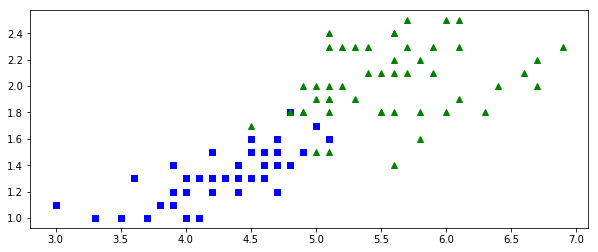

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(x_data[y_data==0, 0], x_data[y_data==0, 1], "bs")
plt.plot(x_data[y_data==1, 0], x_data[y_data==1, 1], "g^")
plt.show()

## 2. Create computation graph

In [4]:
import tensorflow as tf

In [5]:
x = tf.placeholder(tf.float32,shape=[None,2])   # placeholder for input features
y_true = tf.placeholder(tf.float32,shape=[None,1])  # placeholder for true labels

In [6]:
tf.set_random_seed(42)

init_w = tf.random_normal((2,1),0,1)

w = tf.Variable(init_w,tf.float32, name='weights')
b = tf.Variable(0.1,tf.float32, name='bias')
y_linear = tf.matmul(x,w) + b
y_pred = tf.sigmoid(y_linear)

In [7]:
cost = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,logits=y_linear)
cost = tf.reduce_mean(cost)

In [8]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

## 3. Execute computation graph

In [9]:
num_iterations = 10000
cost_val = []

In [10]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for iter in np.arange(num_iterations):
        sess.run(train,{x:x_data, y_true:y_data.reshape(-1,1)})
        if (iter%1000 ==0):
            print(iter, sess.run([tf.transpose(w),b]))
        cost_val.append(sess.run(cost,{x:x_data, y_true:y_data.reshape(-1,1)}))
    w_final = sess.run(w)
    b_final = sess.run(b)

0 [array([[ 0.98388934, -2.497042  ]], dtype=float32), 0.073746346]
1000 [array([[0.19864753, 2.3446977 ]], dtype=float32), -4.7245855]
2000 [array([[0.20235802, 3.8518877 ]], dtype=float32), -7.2535443]
3000 [array([[0.31603038, 4.606274  ]], dtype=float32), -9.060164]
4000 [array([[0.4529554, 5.06824  ]], dtype=float32), -10.495376]
5000 [array([[0.5918572, 5.383767 ]], dtype=float32), -11.69786]
6000 [array([[0.72608835, 5.6153693 ]], dtype=float32), -12.738579]
7000 [array([[0.8535289, 5.794621 ]], dtype=float32), -13.659344]
8000 [array([[0.9737099, 5.939226 ]], dtype=float32), -14.487119]
9000 [array([[1.0868027, 6.0598598]], dtype=float32), -15.240394]


In [11]:
# Alternatively, you could use the following code, which is a slight modification to the previous code.
num_iterations = 10000
cost_val = []
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for iter in np.arange(num_iterations):
        sess.run(train,{x:x_data, y_true:y_data.reshape(-1,1)})
        if (iter%1000 ==0):
            print(iter, sess.run([tf.transpose(w),b]))
        cost_val.append(cost.eval(feed_dict={x:x_data, y_true:y_data.reshape(-1,1)}))
    w_final = w.eval()
    b_final = b.eval()

0 [array([[ 0.98388934, -2.497042  ]], dtype=float32), 0.073746346]
1000 [array([[0.19864753, 2.3446977 ]], dtype=float32), -4.7245855]
2000 [array([[0.20235802, 3.8518877 ]], dtype=float32), -7.2535443]
3000 [array([[0.31603038, 4.606274  ]], dtype=float32), -9.060164]
4000 [array([[0.4529554, 5.06824  ]], dtype=float32), -10.495376]
5000 [array([[0.5918572, 5.383767 ]], dtype=float32), -11.69786]
6000 [array([[0.72608835, 5.6153693 ]], dtype=float32), -12.738579]
7000 [array([[0.8535289, 5.794621 ]], dtype=float32), -13.659344]
8000 [array([[0.9737099, 5.939226 ]], dtype=float32), -14.487119]
9000 [array([[1.0868027, 6.0598598]], dtype=float32), -15.240394]


## 4. Visualize results

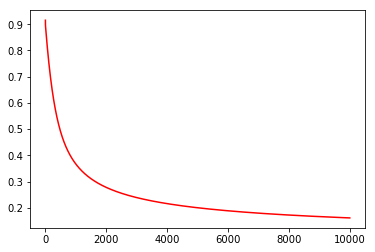

In [12]:
import matplotlib.pyplot as plt
plt.plot(np.arange(num_iterations),cost_val,'-r')
plt.show()

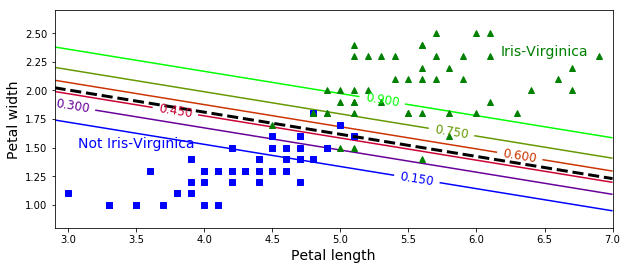

In [13]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

import numpy as np
import matplotlib.pyplot as plt
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = sigmoid(np.matmul(X_new,w_final)+b_final)

plt.figure(figsize=(10, 4))
plt.plot(x_data[y_data==0, 0], x_data[y_data==0, 1], "bs")
plt.plot(x_data[y_data==1, 0], x_data[y_data==1, 1], "g^")

zz = y_proba.reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(w_final[0] * left_right + b_final) / w_final[1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
#plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

## 5. Visualize computation graph

In [14]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [15]:
show_graph(tf.get_default_graph()) # graph not display properly in IE. Use Chrome instead.